In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, rotation_range= 20, zoom_range = 0.2, horizontal_flip=True)

In [ ]:
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Hand Sign Images and models/MP_Data",
    target_size=(416, 416),
    # color_mode="rgb",
    # batch_size=1,
    # class_mode=None,
    shuffle=True,
    subset='training',
    # seed=42
)

test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Hand Sign Images and models/MP_Data",
    target_size=(416, 416),
    # color_mode="rgb",
    # batch_size=1,
    # class_mode=None,
    shuffle=True,
    
    # seed=42,
    subset='validation',
)
# train_generator[0][0][0].shape
# valid_generator[0][0][0].shape
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

Found 1620 images belonging to 9 classes.
Found 405 images belonging to 9 classes.


In [ ]:


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#MODEL
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape=(416, 416, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))
#sgd = optimizers.SGD(lr=1e-2)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])



model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=30,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
50/50 [==============================] - 97s 2s/step - loss: 17.2605 - accuracy: 0.1889 - val_loss: 2.1708 - val_accuracy: 0.2173
Epoch 2/30
50/50 [==============================] - 91s 2s/step - loss: 1.3038 - accuracy: 0.5630 - val_loss: 0.7003 - val_accuracy: 0.7556
Epoch 3/30
50/50 [==============================] - 94s 2s/step - loss: 0.4274 - accuracy: 0.8520 - val_loss: 0.5551 - val_accuracy: 0.8272
Epoch 4/30
50/50 [==============================] - 92s 2s/step - loss: 0.2722 - accuracy: 0.9074 - val_loss: 0.4506 - val_accuracy: 0.8395
Epoch 5/30
50/50 [==============================] - 93s 2s/step - loss: 0.2271 - accuracy: 0.9188 - val_loss: 0.4640 - val_accuracy: 0.8469
Epoch 6/30
50/50 [==============================] - 91s 2s/step - loss: 0.2017 - accuracy: 0.9314 - val_loss: 0.4315 - val_accuracy: 0.8593
Epoch 7/30
50/50 [==============================] - 93s 2s/step - loss: 0.1543 - accuracy: 0.9458 - val_loss: 0.4397 - val_accuracy: 0.8988
Epoch 8/30
50/50 [=

In [ ]:
from tensorflow import keras
model.save("/content/drive/MyDrive/Hand Sign Images and models/Nine_classes.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Hand Sign Images and models/Nine_classes.h5")

In [ ]:
test_generator.class_indices

NameError: ignored

In [ ]:
model.evaluate(test_generator)

13/13 [==============================] - 18s 1s/step - loss: 0.1800 - accuracy: 0.9556


[0.17999358475208282, 0.9555555582046509]

In [ ]:
classes = {0:'angry',
 1:'fine',
 2:'hello',
 3:'help',
 4:'none',
 5:'take_time',
 6:'thanks',
 7:'think',
 8:'tired'}

fine


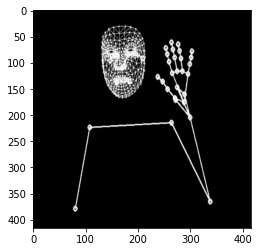

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np


image = cv2.imread("/content/help.jpg")


#image = image.reshape((1, 480, 640, 3))
image = cv2.resize(image,(416,416))
plt.imshow(image)
image = image.reshape(1,416,416,3)

prediction = model.predict(image)
print(classes[np.argmax(prediction)])

thanks


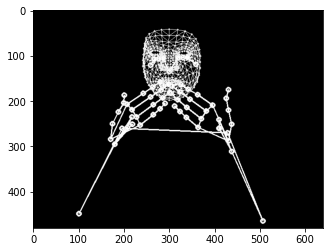

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Hand Sign Images and models/MP_Data/thanks/106.png")
plt.imshow(image)

image = image.reshape((1, 480, 640, 3))
prediction = model.predict(image)
print(classes[np.argmax(prediction)])

# Word Tuner

In [ ]:
! pip install git+https://github.com/PrithivirajDamodaran/Parrot.git

  Cloning https://github.com/PrithivirajDamodaran/Parrot.git to /tmp/pip-req-build-v2lc724p
  Running command git clone -q https://github.com/PrithivirajDamodaran/Parrot.git /tmp/pip-req-build-v2lc724p
     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 34.6 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 895 kB 42.1 MB/s 
     |████████████████████████████████| 6.5 MB 34.5 MB/s 
  Created wheel for parrot: filename=parrot-1.0-py3-none-any.whl size=8695 sha256=07e68f5b8fc516e6b465ea9d132e60f1465834903222d23528370cbf30849f31
  Stored in directory: /tmp/pip-ephem-wheel-cache-s5ssbo96/wheels/d8/27/d8/b757755a5b0b804c59714fdd8a4e2733c20802f638f17f7d96
  Created wheel for python-Levenshtein: filename=python_Levenshtein-

In [ ]:
from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")

def random_state(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

random_state(1234)

parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5", use_gpu=False)

phrases = ["fine take time "]

for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase)
  for para_phrase in para_phrases:
   print(para_phrase)

Downloading:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/736 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/686 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

----------------------------------------------------------------------------------------------------
Input_phrase:  fine take time 
----------------------------------------------------------------------------------------------------
('it takes time - a good thing', 22)
('ok just take your time', 18)
('just make sure i take time', 15)


In [ ]:
phrases = ["hello thanks help "]

for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase)
  for para_phrase in para_phrases:
   print(para_phrase)

----------------------------------------------------------------------------------------------------
Input_phrase:  hello thanks help 
----------------------------------------------------------------------------------------------------
('hello thank you for helping me', 25)
('hello thank you for helping', 23)
